In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")

### State GDP

In [ ]:
gdp_state = pd.read_csv('Data/USGDP_1997_2020.csv')

gdp_state = gdp_state[gdp_state.GeoName != 'United States *']
gdp_state = gdp_state.loc[gdp_state['Description'] == 'All industry total']
gdp_state = gdp_state.drop(['IndustryClassification', 'Description', 'LineCode', 'TableName'], axis=1).reset_index(drop=True)
gdp_state = gdp_state.iloc[:-8, :]
for year in range(1997, 2021):
    gdp_state[str(year)] = pd.to_numeric(gdp_state[str(year)])

# toggle info views
# gdp_state.head()
# gdp_state.info()
# gdp_state.isna().sum()
gdp_state.head()

### Airline Flights DF

In [8]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')
airline_flights.sort_values(by=['Year', 'quarter'], ascending=[True, True], inplace=True)
# airline_flights.shape
airline_flights.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
5930,Table 1a,1993,1,31453,32457,"Houston, TX","San Francisco, CA (Metropolitan Area)",12266,13796,IAH,OAK,1657,51,272.66,HP,0.64,230.26,HP,0.64,230.26,"Houston, TX\n(29.760803, -95.369506)","San Francisco, CA (Metropolitan Area)\n(37.780...",199311226613796IAHOAK
5961,Table 1a,1993,1,30599,32575,"Birmingham, AL","Los Angeles, CA (Metropolitan Area)",10599,12954,BHM,LGB,1815,2,290.64,AA,1.00,290.64,AA,1.00,290.64,"Birmingham, AL\n(33.522859, -86.807705)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",199311059912954BHMLGB
5969,Table 1a,1993,1,31703,34524,"New York City, NY (Metropolitan Area)","Richmond, VA",15070,14524,SWF,RIC,325,4,173.52,US,0.81,178.83,US,0.81,178.83,"New York City, NY (Metropolitan Area)\n(40.123...","Richmond, VA\n(37.540759, -77.433932)",199311507014524SWFRIC
5983,Table 1a,1993,1,33570,30852,"San Diego, CA","Washington, DC (Metropolitan Area)",14679,11278,SAN,DCA,2295,266,290.94,AA,0.26,343.23,NW,0.24,209.78,"San Diego, CA\n(32.71576, -117.163817)","Washington, DC (Metropolitan Area)\n(38.892062...",199311467911278SANDCA
6022,Table 1a,1993,1,32467,33342,"Miami, FL (Metropolitan Area)","Milwaukee, WI",13303,13342,MIA,MKE,1259,192,173.29,NW,0.54,155.89,NW,0.54,155.89,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Milwaukee, WI\n(43.041072, -87.909421)",199311330313342MIAMKE


In [9]:
airline_flights.rename(columns={
    'quarter': 'Quarter',
    'city1': 'Origin_City_Name',
    'city2': 'Destination_City_Name',
    'airportid_1': 'Origin_Airport_ID',
    'airportid_2': 'Destination_Airport_ID',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Between_Airports',
    'passengers': 'Num_Passengers',
    'fare': 'Average_Fare',
}, inplace=True)

In [10]:
airline_flights = airline_flights[[
                  #  'tbl', 
                  'Year', 'Quarter', 
                  #   'citymarketid_1', 'citymarketid_2',
                  'Origin_City_Name', 'Destination_City_Name', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
                  'Destination_Airport_Code', 'Distance_Between_Airports', 'Num_Passengers', 'Average_Fare',
                  #   'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low',
                  'Geocoded_City1', 'Geocoded_City2', 
                  #   'tbl1apk'
                    ]].copy()

In [ ]:
airline_flights = airline_flights[~airline_flights['Year'].between(1993, 1996)]

# Toggle to remove Metropolitan area
# airline_flights['Origin_City_Name'] = airline_flights['Origin_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
# airline_flights['Destination_City_Name'] = airline_flights['Destination_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)

airline_flights[['Destination_City', 'Destination_State']] = airline_flights['Destination_City_Name'].str.split(", ", expand=True)
airline_flights[['Origin_City', 'Origin_State']] = airline_flights['Origin_City_Name'].str.split(", ", expand=True)

airline_flights.head()

In [627]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

airline_flights = airline_flights.replace({
    'Destination_State': state_mapping,
    'Origin_State': state_mapping
    })

In [ ]:
airline_flights = airline_flights.dropna()
airline_flights.head()

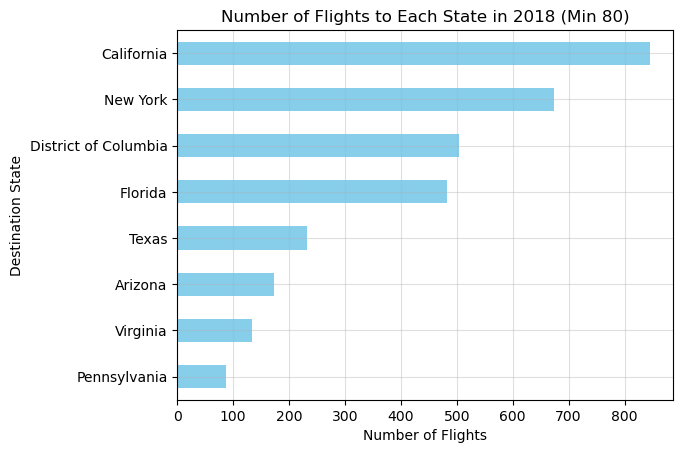

In [638]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

destination_counts = flights_2018['Destination_State'].value_counts()
destination_counts_filtered = destination_counts[destination_counts > 80].sort_values(ascending=True)


destination_counts_filtered.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Flights')
plt.ylabel('Destination State')
plt.title('Number of Flights to Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)


plt.show()

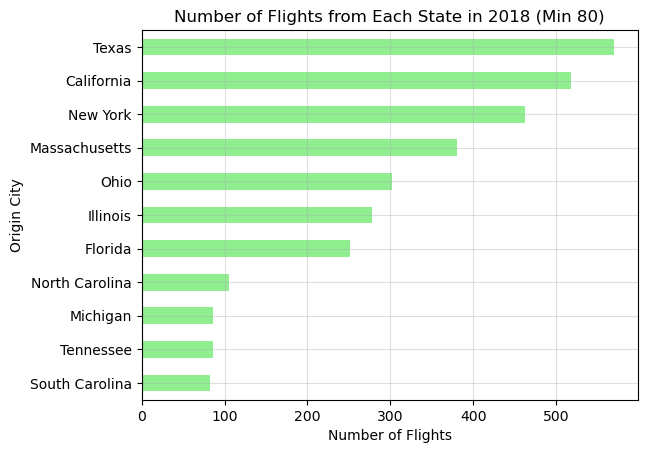

In [639]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

origin_counts = flights_2018['Origin_State'].value_counts()
origin_counts_filtered = origin_counts[origin_counts > 80].sort_values(ascending=True)


origin_counts_filtered.plot(kind='barh', color='lightgreen')

plt.xlabel('Number of Flights')
plt.ylabel('Origin City')
plt.title('Number of Flights from Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)


plt.show()

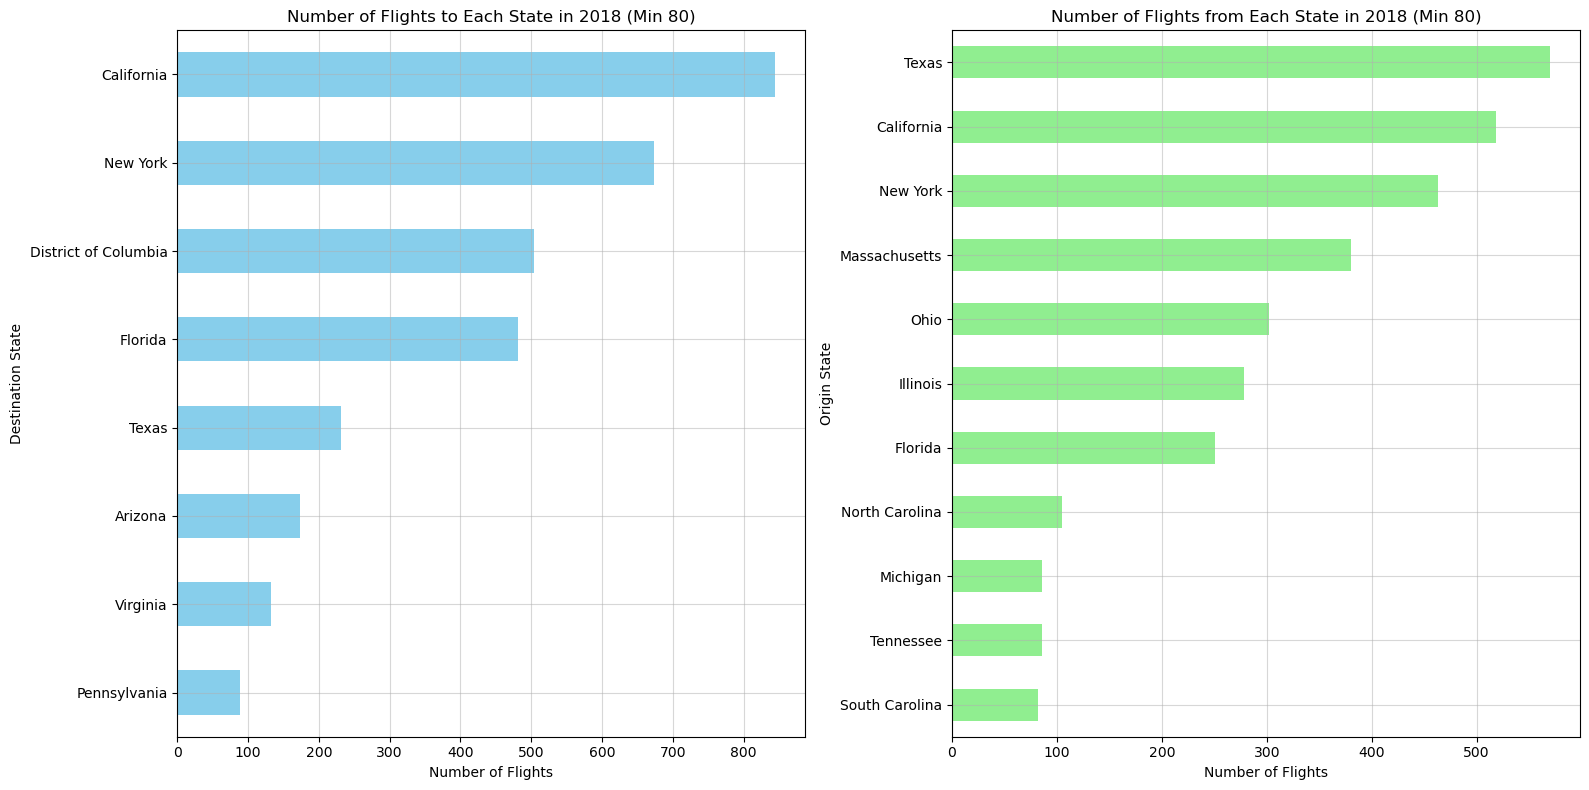

In [640]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
destination_counts_filtered.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Destination State')
axes[0].set_title('Number of Flights to Each State in 2018 (Min 80)')
axes[0].grid(True, alpha=0.5)


origin_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Flights')
axes[1].set_ylabel('Origin State')
axes[1].set_title('Number of Flights from Each State in 2018 (Min 80)')
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### Combining GDP and Flights

In [651]:
flights_2018 = airline_flights.loc[airline_flights.Year == 2018]

In [652]:
flights_2018

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
205836,2018,1,"Aspen, CO","New York City, NY",10372,12953,ASE,LGA,1750,121,509.64,"Aspen, CO\n(39.190665, -106.819201)","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Aspen,Colorado
205968,2018,1,"Aspen, CO","Los Angeles, CA",10372,12954,ASE,LGB,737,0,215.85,"Aspen, CO\n(39.190665, -106.819201)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,California,Aspen,Colorado
206010,2018,1,"Aspen, CO","Los Angeles, CA",10372,13891,ASE,ONT,737,2,283.67,"Aspen, CO\n(39.190665, -106.819201)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,California,Aspen,Colorado
206075,2018,1,"Albuquerque, NM","Los Angeles, CA",10140,10800,ABQ,BUR,677,51,181.42,"Albuquerque, NM\n(35.084248, -106.649241)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,California,Albuquerque,New Mexico
206076,2018,1,"Albuquerque, NM","Washington, DC",10140,10821,ABQ,BWI,1670,176,273.11,"Albuquerque, NM\n(35.084248, -106.649241)","Washington, DC (Metropolitan Area)\n(38.892062...",Washington,District of Columbia,Albuquerque,New Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210258,2018,2,"Fayetteville, AR","New York City, NY",15919,12197,XNA,HPN,1187,4,385.17,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Fayetteville,Arkansas
210259,2018,2,"Fayetteville, AR","New York City, NY",15919,12391,XNA,ISP,1187,0,657.00,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Fayetteville,Arkansas
210260,2018,2,"Fayetteville, AR","New York City, NY",15919,12478,XNA,JFK,1187,7,331.65,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Fayetteville,Arkansas
210261,2018,2,"Fayetteville, AR","New York City, NY",15919,12953,XNA,LGA,1187,241,286.61,"Fayetteville, AR\n(36.061928, -94.160583)","New York City, NY (Metropolitan Area)\n(40.123...",New York City,New York,Fayetteville,Arkansas


In [653]:
state_counts_2018 = pd.DataFrame(flights_2018['Destination_State'].value_counts())
state_counts_2018.head()

,count
Destination_State,
California,845
New York,673
District of Columbia,504
Florida,482
Texas,232


In [654]:
gdp_state_2018 = gdp_state[['GeoName','2018']]
gdp_state_2018.head()

,GeoName,2018
0,Alabama,221030.7
1,Alaska,54292.9
2,Arizona,350718.3
3,Arkansas,127761.3
4,California,2975083.0
